In [1]:
!pip install -q transformers datasets
!pip install --upgrade -q accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 7.0 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset
from transformers import AutoImageProcessor, DeiTForImageClassification
from PIL import Image
import requests

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
ds = load_dataset('cifar10')
ds

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/datasets/features/image.py:325: UserWarning: Downcasting array dtype uint8 to uint8 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")


Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'label'],
        num_rows: 10000
    })
})

In [10]:
import random
random.seed(0)

index = random.randint(0, 10)
index

6

In [11]:
ds['train'][index]

{'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x7FC7AAA32050>,
 'label': 1}

In [12]:
image = ds['train'][index]['img']

In [13]:
ds['train'].features['label'].names 

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

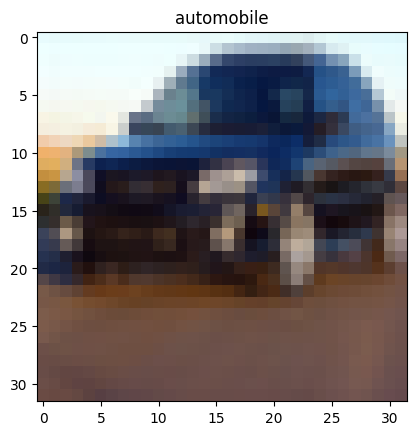

In [14]:
plt.imshow(image)
plt.title(ds['train'].features['label'].names[ds['train'][index]['label']])
plt.show()

In [15]:
feature_extractor = AutoImageProcessor.from_pretrained('facebook/deit-small-distilled-patch16-224')
model = DeiTForImageClassification.from_pretrained('facebook/deit-small-distilled-patch16-224')

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Some weights of the model checkpoint at facebook/deit-small-distilled-patch16-224 were not used when initializing DeiTForImageClassification: ['cls_classifier.weight', 'cls_classifier.bias', 'distillation_classifier.bias', 'distillation_classifier.weight']
- This IS expected if you are initializing DeiTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DeiTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DeiTForImageClassification were not initialized from the model checkpoint at facebook/deit-small-distilled-patch16-224 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream

In [16]:
feature_extractor(image, return_tensors='pt')['pixel_values'].shape

torch.Size([1, 3, 224, 224])

In [17]:
inputs = feature_extractor(images=image, return_tensors="pt")

In [18]:
outputs = model(**inputs)

In [19]:
outputs.logits.detach().argmax(axis=1)

tensor([809])

In [21]:
def process_example(example):
    inputs = feature_extractor(example['img'], return_tensors='pt')
    inputs['labels'] = example['label']
    return inputs

process_example(ds['train'][index])

{'pixel_values': tensor([[[[ 1.9407,  1.9578,  1.9578,  ...,  1.8379,  1.8379,  1.8379],
          [ 1.9407,  1.9578,  1.9578,  ...,  1.8379,  1.8379,  1.8379],
          [ 1.9407,  1.9578,  1.9578,  ...,  1.8379,  1.8379,  1.8379],
          ...,
          [-0.4226, -0.4397, -0.4397,  ..., -0.1999, -0.2171, -0.2171],
          [-0.4226, -0.4397, -0.4397,  ..., -0.1999, -0.2171, -0.2342],
          [-0.4226, -0.4226, -0.4397,  ..., -0.1999, -0.2171, -0.2342]],

         [[ 2.3936,  2.4111,  2.4111,  ...,  2.3761,  2.3761,  2.3761],
          [ 2.3936,  2.4111,  2.4111,  ...,  2.3585,  2.3585,  2.3585],
          [ 2.3761,  2.3936,  2.3936,  ...,  2.3585,  2.3585,  2.3585],
          ...,
          [-0.7927, -0.7927, -0.8102,  ..., -0.5826, -0.5826, -0.6001],
          [-0.7927, -0.8102, -0.8102,  ..., -0.5826, -0.5826, -0.6001],
          [-0.7927, -0.8102, -0.8102,  ..., -0.5826, -0.5826, -0.6001]],

         [[ 2.6226,  2.6226,  2.6400,  ...,  2.6051,  2.6051,  2.6051],
          [ 2

In [23]:
def transform(example_batch):
    inputs = feature_extractor([x for x in example_batch['img']], return_tensors='pt')
    inputs['labels'] = example_batch['label']
    return inputs

In [24]:
prepared_ds = ds.with_transform(transform)

In [25]:
prepared_ds['train'][0:2]

{'pixel_values': tensor([[[[ 0.9474,  0.9474,  0.9474,  ...,  0.8276,  0.8104,  0.8104],
          [ 0.9474,  0.9474,  0.9474,  ...,  0.8104,  0.7933,  0.7933],
          [ 0.9303,  0.9303,  0.9303,  ...,  0.8104,  0.7933,  0.7933],
          ...,
          [-0.1486, -0.1314, -0.1314,  ..., -0.3883, -0.4054, -0.4054],
          [-0.1486, -0.1314, -0.1314,  ..., -0.3883, -0.4054, -0.4054],
          [-0.1486, -0.1314, -0.1314,  ..., -0.3712, -0.3883, -0.3883]],

         [[ 1.0630,  1.0630,  1.0630,  ...,  0.9405,  0.9230,  0.9230],
          [ 1.0630,  1.0630,  1.0630,  ...,  0.9230,  0.9055,  0.9055],
          [ 1.0455,  1.0455,  1.0455,  ...,  0.9230,  0.9055,  0.9055],
          ...,
          [-0.1099, -0.1099, -0.1099,  ..., -0.3375, -0.3550, -0.3550],
          [-0.1099, -0.1099, -0.1099,  ..., -0.3375, -0.3550, -0.3550],
          [-0.1275, -0.1275, -0.1275,  ..., -0.3375, -0.3550, -0.3550]],

         [[ 1.5071,  1.5071,  1.5071,  ...,  1.3502,  1.3328,  1.3328],
          [ 1

In [26]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

In [27]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

<ipython-input-27-3044fb6e3895>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [28]:
labels = ds['train'].features['label'].names

model = DeiTForImageClassification.from_pretrained(
    'facebook/deit-small-distilled-patch16-224',
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)},
    ignore_mismatched_sizes=True
)

Some weights of the model checkpoint at facebook/deit-small-distilled-patch16-224 were not used when initializing DeiTForImageClassification: ['cls_classifier.weight', 'cls_classifier.bias', 'distillation_classifier.bias', 'distillation_classifier.weight']
- This IS expected if you are initializing DeiTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DeiTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DeiTForImageClassification were not initialized from the model checkpoint at facebook/deit-small-distilled-patch16-224 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream

In [29]:
for param in model.base_model.parameters():
    param.requires_grad = False

In [30]:
from transformers import Trainer
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./DeiT",
  per_device_train_batch_size=512,
  num_train_epochs=10,
  fp16=True,
  save_steps=10,
  label_names=['labels', 'label'],
  logging_steps=10,
  learning_rate=1e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["test"],
    tokenizer=feature_extractor,
)

for param in model.base_model.parameters():
    param.requires_grad = False

for param in model.deit.encoder.layer[11].parameters():
    param.requires_grad = True

for param in model.classifier.parameters():
    param.requires_grad = True

train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss
10,2.177800
20,1.515300
30,0.924900
40,0.512100
50,0.320600
60,0.256200
70,0.227300
80,0.215600
90,0.195800
100,0.189900


***** train metrics *****
  epoch                    =         10.0
  total_flos               = 9113878595GF
  train_loss               =       0.1467
  train_runtime            =   0:50:28.78
  train_samples_per_second =      165.082
  train_steps_per_second   =        0.324


In [33]:
train_results

TrainOutput(global_step=980, training_loss=0.1467450251384657, metrics={'train_runtime': 3028.7899, 'train_samples_per_second': 165.082, 'train_steps_per_second': 0.324, 'total_flos': 9.785952626688e+18, 'train_loss': 0.1467450251384657, 'epoch': 10.0})

In [36]:
import json
with open('./DeiT/trainer_state.json', 'r') as f:
  train_history = json.loads(f.read())

train_history

{'best_metric': None,
 'best_model_checkpoint': None,
 'epoch': 10.0,
 'global_step': 980,
 'is_hyper_param_search': False,
 'is_local_process_zero': True,
 'is_world_process_zero': True,
 'log_history': [{'epoch': 0.1,
   'learning_rate': 9.897959183673469e-05,
   'loss': 2.1778,
   'step': 10},
  {'epoch': 0.2,
   'learning_rate': 9.79591836734694e-05,
   'loss': 1.5153,
   'step': 20},
  {'epoch': 0.31,
   'learning_rate': 9.693877551020408e-05,
   'loss': 0.9249,
   'step': 30},
  {'epoch': 0.41,
   'learning_rate': 9.591836734693878e-05,
   'loss': 0.5121,
   'step': 40},
  {'epoch': 0.51,
   'learning_rate': 9.489795918367348e-05,
   'loss': 0.3206,
   'step': 50},
  {'epoch': 0.61,
   'learning_rate': 9.387755102040817e-05,
   'loss': 0.2562,
   'step': 60},
  {'epoch': 0.71,
   'learning_rate': 9.285714285714286e-05,
   'loss': 0.2273,
   'step': 70},
  {'epoch': 0.82,
   'learning_rate': 9.183673469387756e-05,
   'loss': 0.2156,
   'step': 80},
  {'epoch': 0.92,
   'learning_r

In [40]:
epochs = [epoch for epoch in map(lambda x: x['epoch'], train_history['log_history'][:-1])]
losses = [loss for loss in map(lambda x: x['loss'] , train_history['log_history'][:-1])]

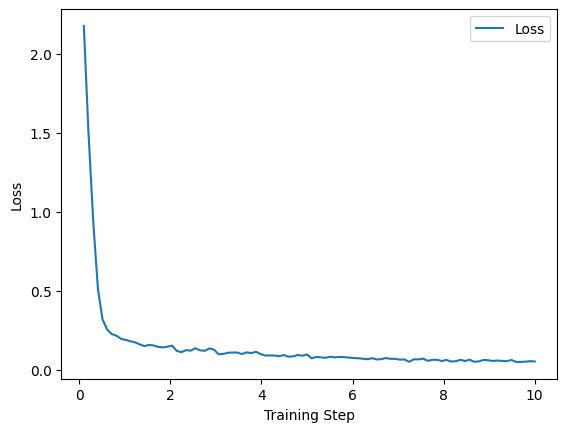

In [44]:
plt.plot(epochs, losses, label='Loss')
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [45]:
trainer.evaluate()

{'eval_runtime': 73.6655,
 'eval_samples_per_second': 135.749,
 'eval_steps_per_second': 16.969,
 'epoch': 10.0}